# UCCD2063 Machine Learning Classification Assignment
The following is the Machine Learning algorithm designed to conduct classification tasks for multivariant attributes.

**Contributors:**
- Yee Zi Yang 18ACB02834
- Lee Wai Hin 18ACB02736
- Tan Jie Nan 18ACB02121

**Classification Dataset:**
- Firewall rules action on malicious data transfer

## Table of Content
1. [Data Initialization](#data_init)
2. [Data Preprocessing - Label Binarizer](#data_pros_bin)
3. [Data Preprocessing - One Hot Encoding](#data_pros_ohe)

### Algorithm's Section:
- [Decision Tree Regressor](#dt_section)
- [Random Forest Classifier](#rfc_section)
- [Stochastic Gradient Descent Classifier](#sgd_section)
- [Logistic Regession](#log_section)
- [k-Nearest Neighbors Classifier](#knn_section)


<a id="data_init"></a>
# 1.0 Data Initialization
<hr>

In [42]:
#Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
print ('==> Loading specified dataset...\n')
firewall_data =  pd.read_csv("Firewall_data_sets.csv")
print ('==> Dataset loading completed.\n')


==> Loading specified dataset...

==> Dataset loading completed.



In [43]:
firewall_data.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [44]:
firewall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [45]:
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


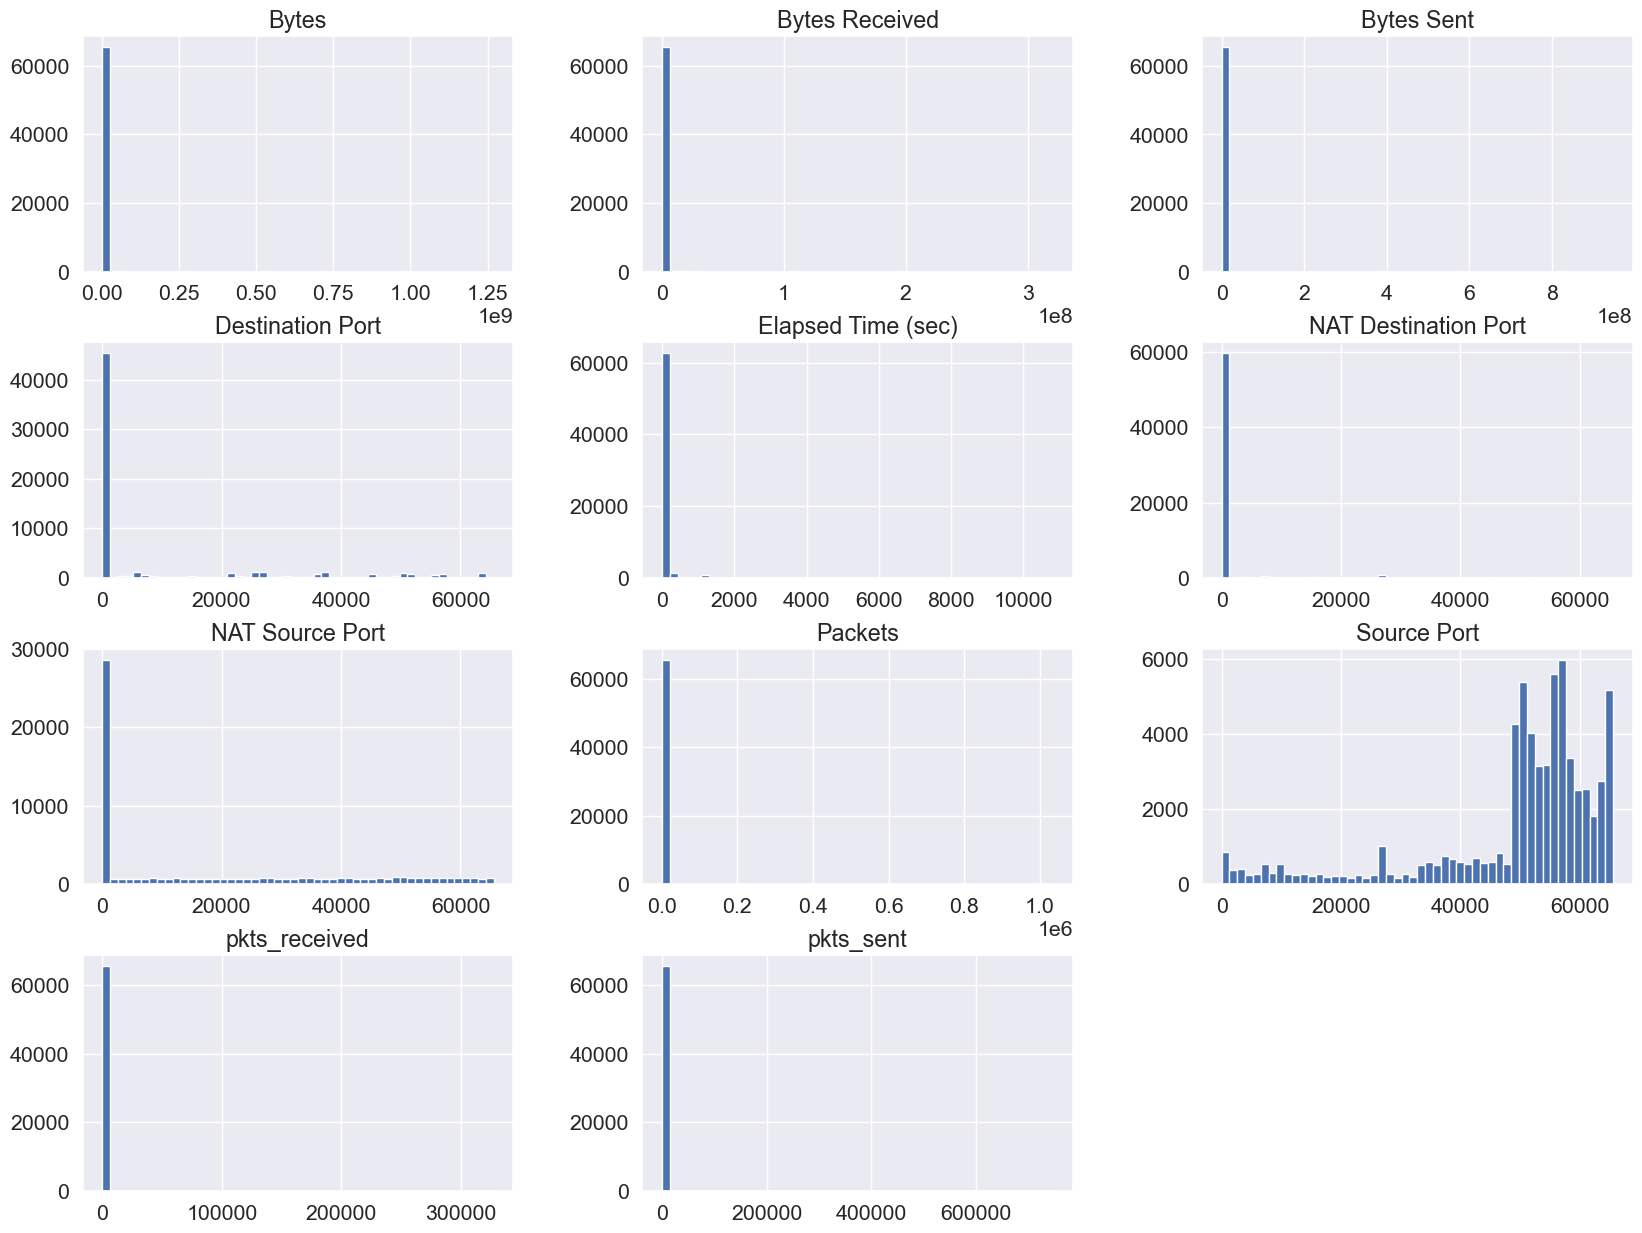

In [46]:
firewall_data.hist(bins=50,figsize=(20,15))
plt.show()

In [47]:
firewall_data.Action.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [48]:
firewall_data.corr() #correlation

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


<a id="data_pros_bin"></a>
# 2.1 Data Preprocessing - Label Binarizer
<hr>

In [49]:
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
firewall_data.Action = lb_encoder.fit_transform(firewall_data.Action)
#firewall_data
#print(firewall_data.Action.value_counts().count)
#print(firewall_data.describe())
#print(type(firewall_data))
firewall_data.corr()


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.132189,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.367960,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.754348,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.235859,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Action,0.132189,-0.367960,0.754348,0.235859,1.000000,0.014869,0.005017,0.026119,0.017083,0.187367,0.010804,0.023798
Bytes,0.000221,-0.005297,0.010659,0.003975,0.014869,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.005017,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.026119,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.017083,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.187367,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954


In [50]:
type(firewall_data)

pandas.core.frame.DataFrame

In [51]:
firewall_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,0.574376,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,0.494441,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,1.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [52]:
corr_matrix = firewall_data.corr()
corr_matrix['Action'].sort_values(ascending=False)

Action                  1.000000
NAT Source Port         0.754348
NAT Destination Port    0.235859
Elapsed Time (sec)      0.187367
Source Port             0.132189
Bytes Received          0.026119
pkts_received           0.023798
Packets                 0.017083
Bytes                   0.014869
pkts_sent               0.010804
Bytes Sent              0.005017
Destination Port       -0.367960
Name: Action, dtype: float64

In [53]:
firewall_data.head(8)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,1,177,94,83,2,30,1,1
1,56258,3389,56258,3389,1,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,1,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,1,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,1,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,1,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,1,320,140,180,6,7,3,3
7,50049,443,21285,443,1,7912,3269,4643,23,96,12,11


In [73]:
# write code to separate the output (y) from input (X)
X = firewall_data.drop('Action', axis = 1)
y = firewall_data['Action']

In [74]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Feature extraction
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, y)

#Summarize scores
np.set_printoptions(precision = 5)
print(fit.scores_)

features = fit.transform(X)

#Summarize selected features
print(features[0:8, :])


[5.39571e+06 2.86033e+08 9.33478e+08 1.29453e+08 4.70895e+09 1.07965e+09
 3.62931e+09 4.89829e+06 3.19688e+06 1.91424e+06 2.98475e+06]
[[57222    53 54587    53   177    94    83     2]
 [56258  3389 56258  3389  4768  1600  3168    19]
 [ 6881 50321 43265 50321   238   118   120     2]
 [50553  3389 50553  3389  3327  1438  1889    15]
 [50002   443 45848   443 25358  6778 18580    31]
 [51465   443 39975   443  3961  1595  2366    21]
 [60513 47094 45469 47094   320   140   180     6]
 [50049   443 21285   443  7912  3269  4643    23]]


In [75]:
X = firewall_data.drop(['Action'], axis =1)

In [76]:
print('Shape of original dataset, train', firewall_data.shape)
print('X: shape=', X.shape, 'type=', type(X))
print('y: shape=', y.shape, 'type=', type(y))
print(y)

Shape of original dataset, train (65532, 12)
X: shape= (65532, 11) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (65532,) type= <class 'pandas.core.series.Series'>
0        1
1        1
2        1
3        1
4        1
        ..
65527    1
65528    1
65529    0
65530    0
65531    0
Name: Action, Length: 65532, dtype: int32


In [77]:
X.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [78]:
y.isnull().sum()

0

In [79]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

print('full set shape =', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)


full set shape = (65532, 11)
train shape= (52425, 11)
test shape= (13107, 11)


In [62]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [64]:
print(X_train.mean (axis = 0))
print(X_train.std (axis = 0))

print('>>> Mean of all columns:\n', X_train.mean())
print('\n>>> Std of all columns:\n', X_train.std())

[ 1.11209e-16 -1.75307e-15 -5.42403e-16 -2.26832e-16 -3.80219e-16
 -8.68111e-17  6.61928e-16  1.24616e-17  5.20527e-16  3.30170e-16
 -1.45569e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
>>> Mean of all columns:
 1.7021975800105405e-17

>>> Std of all columns:
 0.9999999999999908


In [65]:
print('Possible values of Action:\n', lb_encoder.classes_)

Possible values of Action:
 ['allow' 'deny' 'drop' 'reset-both']


In [66]:
print('X_train shape: ', X_train.shape)
print(type(y_train))
print('y_train shape: ', y_train.shape)

X_train shape:  (52425, 11)
<class 'numpy.ndarray'>
y_train shape:  (52425,)


<a id="dt_section"></a>
# Decision Tree Regression
<hr>

In [86]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
#create a instance of DecisionTreeRegressor
#tree_reg = ?
tree_reg = DecisionTreeRegressor()

#Train the regressor model
tree_reg.fit(X_train, y_train)

#Predict on training set using trained regressor
y_pred = tree_reg.predict(X_train)

#Show the result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))


show10results(y_train, y_pred)

#Compute and show the RMSE on training set
tree_mse = mean_squared_error(y_pred, y_train)
tree_rmse = np.sqrt(tree_mse)
print('RMSE = ', tree_rmse)

Result for the 10 random samples: 
actual =       1 pred =      1
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       1 pred =      1
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       0 pred =      0
RMSE =  0.010358384880813021


<a id="rf_section"></a>
# Random Forest Classifier
<hr>

In [87]:
from sklearn.ensemble import RandomForestClassifier

# create a instance of RandomForestRegressor
# forest_reg = ?
forest_reg = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the regressor model
forest_reg.fit (X_train, y_train)

# Predict on training set using trained regressor
y_pred = forest_reg.predict(X_train)
# Show the result of 10 random samples
def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

show10results(y_train, y_pred)


# Compute and show the RMSE on training set
forest_mse = mean_squared_error(y_pred, y_train)
forest_rmse= np.sqrt(forest_mse)
print('RMSE =', forest_rmse)

Result for the 10 random samples:
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
actual =       1 pred =      1
actual =       1 pred =      1
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       1 pred =      1
actual =       1 pred =      1
RMSE = 0.013102435641608368


In [88]:
firewall_data.Action.mean()

0.5743758774339254

# Evaluating 

In [89]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores: ', scores, '\n')
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
# perform k-fold cross-out validation
# use cross_val_score on tree_reg
k_fold_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

# convert NMSE to RMSE
tree_rmse_scores = np.sqrt(-k_fold_scores)

# use display_scores to show the results
display_scores(tree_rmse_scores)

Scores:  [0.02343 0.01263 0.01277 0.01953 0.01914] 

Mean:  0.017499567771755382
Standard deviation:  0.00419544916116395


In [90]:
# use cross_val_score on forest_reg

k_fold_scores = cross_val_score(forest_reg, X_train, y_train, scoring ='neg_mean_squared_error', cv=5)

# covert NMSE to RMSE
forest_rmse_scores = np.sqrt(-k_fold_scores)

# use display_scores to show the results
display_scores(forest_rmse_scores)

Scores:  [0.01953 0.00977 0.01381 0.01692 0.00977] 

Mean:  0.013958053441317685
Standard deviation:  0.0038725058543999527


<a id="sgd_section"></a>
# Stochastic Gradient Descent Classifier
<hr>

### Training an action model

In [91]:
# import the SGD from sklearn

from sklearn.linear_model import SGDClassifier

# Train using the training set
sgd_clf = SGDClassifier (random_state = 42, max_iter = 5, tol = None)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=None)

### Performing predictions

In [92]:
y_pred_sgd = sgd_clf.predict(X_train)
y_pred_sgd

array([0, 1, 1, ..., 0, 1, 1])

#### Detection result for some randomly generated samples

In [93]:
def peek_results(actual, predicted, num = 20):
    print('actual | Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' | ', predicted[sel])

peek_results(y_train, y_pred_sgd)

actual | Predicted
------------------
0  |  0
0  |  0
1  |  1
0  |  0
1  |  1
0  |  0
1  |  1
1  |  1
0  |  0
0  |  0
0  |  0
1  |  1
0  |  0
1  |  1
0  |  0
1  |  1
1  |  1
1  |  1
1  |  1
1  |  1


### Performance measure: Accuracy

In [94]:
from sklearn.metrics import accuracy_score

# compute accuracy using accuracy_score and show the result
train_acc = accuracy_score(y_train, y_pred_sgd)
print('Training accuracy: {:.4f}'.format(train_acc))

Training accuracy: 0.9974


### Measuring training accuracy using Cross-validation

In [95]:
# compute 5-fold cross validation accuracy and show the result
# k_scores = ....

k_scores = cross_val_score(sgd_clf, X_train, y_train, cv = 5, scoring = 'accuracy')
k_scores

array([0.99752, 0.99695, 0.99752, 0.99781, 0.99819])

#### Problems with accuracy

In [96]:
y_train_pred_sgd = sgd_clf.predict(X_train) 
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_pred_sgd))

y_train_allzero = np.zeros(len(y_train), dtype=bool)
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_allzero))

y_train_allzero = np.ones(len(y_train), dtype=bool)
print('Accuracy using prediction values: ', accuracy_score(y_train, y_train_allzero))

Accuracy using prediction values:  0.9974248927038627
Accuracy using prediction values:  0.4266666666666667
Accuracy using prediction values:  0.5733333333333334


### Performance Measure: Confusion Matrix

#### Perform cross-validated prediction

In [97]:
from sklearn.model_selection import cross_val_predict

# perform cross-validation prediction using cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, X_train, y_train, cv = 5)
y_pred_cv

array([0, 1, 1, ..., 0, 1, 1])

In [98]:
peek_results(y_train, y_pred_cv)

actual | Predicted
------------------
1  |  1
0  |  0
1  |  1
0  |  0
1  |  1
1  |  1
0  |  0
1  |  1
0  |  0
0  |  0
0  |  0
1  |  1
1  |  1
0  |  0
0  |  0
0  |  0
1  |  1
0  |  0
0  |  0
1  |  1


#### Compute the confusion matrix

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_cv)
print(cm)

[[22347    21]
 [  105 29952]]


### Performance Measure: Precision, Recall and F1 Score

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score

# compute and print the precision, recall and f1 score
print('Precision = ', precision_score(y_train, y_pred_cv))
print('Recall = ', recall_score(y_train, y_pred_cv))
print('Precision = ', f1_score(y_train, y_pred_cv))


Precision =  0.9992993694324892
Recall =  0.996506637388961
Precision =  0.9979010494752624


### Performance Measure: Precision-Recall curve

#### Generating prediction scores

In [101]:
def peek_scores(actual, scores, num = 20):
    print('actual | score')
    print('---------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' | ', scores[sel])

y_scores = sgd_clf.decision_function(X_train) # retrieve classification scores

In [102]:
peek_scores(y_train, y_scores)

actual | score
---------------
1  |  8.949307611467269
0  |  -1.6096156444984597
0  |  -2.128783666211188
1  |  0.07987663027202352
1  |  8.758808325298766
1  |  4.931737324837062
1  |  9.919608259144827
0  |  -1.1273136712494036
1  |  1.9530465079741397
1  |  12.58605429986307
1  |  12.092882517755562
1  |  20.23545739773378
0  |  -1.596545600179411
0  |  -1.1406260704922246
1  |  22.978895991439806
0  |  -1.1320248422937347
1  |  10.749052270519533
0  |  -1.1373066995315249
1  |  15.131096867278067
1  |  2.503895971053674


In [103]:
# retrieve the average cross-validated prediction score values for all samples
# y_scores_cv = ....
y_scores_cv = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = 'decision_function')
y_scores_cv

array([-1.09342, 11.05545, 10.62624, ..., -1.319  ,  5.8434 ,  9.67623])

#### Plot precision and recall graph

In [104]:
from sklearn.metrics import precision_recall_curve
# compute precision-recall pairs for different threshold values
# precisions, recalls, thresholds = .....
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

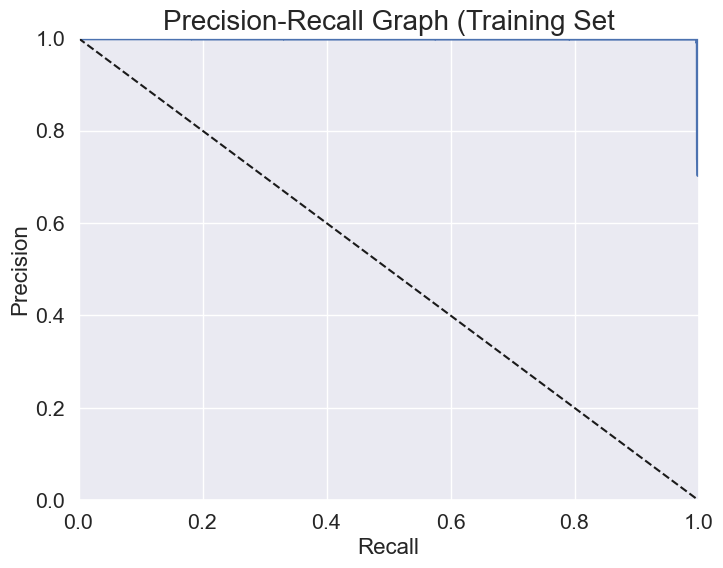

In [105]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel('Recall', fontsize = 16)
    plt.ylabel('Precision', fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title('Precision-Recall Graph (Training Set', fontsize = 20)
plt.show()

# Performance measure: ROC curve

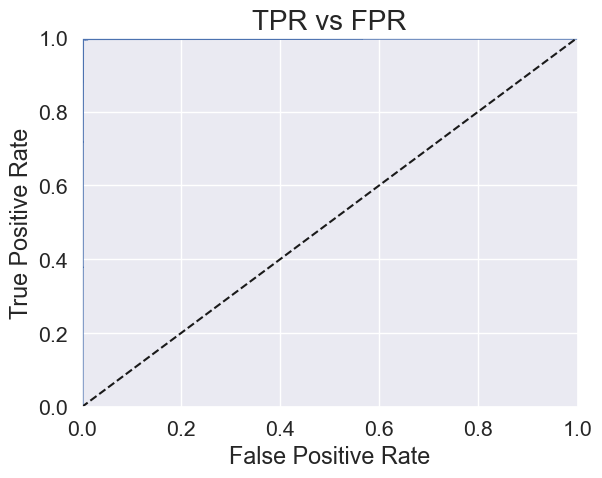

In [106]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)
    
plot_roc_curve(fpr, tpr)

# The AUC (Area under curve) measure

In [107]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.9991


# Evaluate model on test set

In [108]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_test = sgd_clf.predict(X_test)

print('Test precision = {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Test recall = {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('Test f1 score = {:.4f}'.format(f1_score(y_test, y_pred_test)))



Test precision = 0.7345
Test recall = 0.9971
Test f1 score = 0.8459


# Classifier Comparison

### SGDClassifier vs RandomForestClassifier

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 200, random_state = 42)
sgd_result = cross_validate (sgd_clf, X_train, y_train, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1'])

print('SGDClassifier: validation accuracy  = {:.4f}'.format(sgd_result['test_accuracy'].mean()))
print('SGDClassifier: validation recall    = {:.4f}'.format(sgd_result['test_recall'].mean()))
print('SGDClassifier: validation precision = {:.4f}'.format(sgd_result['test_precision'].mean()))
print('SGDClassifier: validation f1        = {:.4f}'.format(sgd_result['test_f1'].mean()))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
forest_result = cross_validate(forest_clf, X_train, y_train, cv = 5, scoring = ['accuracy', 'precision', 'recall', 'f1'])

print('Forest: validation accuracy = {:.4f}'.format(forest_result['test_accuracy'].mean()))
print('Forest: validation recall = {:.4f}'.format(forest_result['test_recall'].mean()))
print('Forest: validation precision = {:.4f}'.format(forest_result['test_precision'].mean()))
print('Forest: validation f1 = {:.4f}'.format(forest_result['test_f1'].mean()))

## Comparing classifiers using the ROC curve
### SGDClassifier: decision_function
### RandomForestClassifier: predict_proba

In [ ]:
print('Computing scores for SGDClassifier...', end = '')
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = 'decision_function')
print('done')

print('Computing scores for RandomForestClassifier...', end='')
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 5, method = 'predict_proba')
print('done')

In [ ]:
print('Shape of y_scores_sgd:', y_scores_sgd.shape)
print('Shape of y_scores_sgd:', y_scores_forest.shape)

In [ ]:
y_scores_forest = y_scores_forest[:, 1]

In [ ]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve (y_train, y_scores_sgd)
fpr_forest, tpr_forest, thresholds_forest = roc_curve (y_train, y_scores_forest)

In [ ]:
plt.figure(figsize = (8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, 'r-', 'SGDClassifier')
plot_roc_curve(fpr_forest, tpr_forest, 'b-', 'RandomForestClassifier')
plt.legend (loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc_sgd = roc_auc_score(y_train, y_scores_sgd)
print('AUC for SGDClassifier = {:.4f}'.format(auc_sgd))

auc_forest = roc_auc_score(y_train, y_scores_forest)
print('AUC for RandomForestClassifier = {:.4f}'.format(auc_forest))

<a id="log_section"></a>
# Logistic Regression Classifier
<hr>

In [163]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # to ensure we have consistent results

The output for this dataset consists of 4 unique values: Allow, Deny, Drop and Reset-both. Thus we must consider a **multioutput regression** solution. One of the possible training model that could be used is: **Logistic Regression**.

The actual dataset output, **y** is in categorical value, we no need to convert it to a numerical value because Logistic regression will automatically used the **multinomial multiclass** for this dataset output.


In [170]:
# Data Preprocessing
X = firewall_data.drop(['Action'], axis =1)
y = firewall_data['Action']

In [171]:
# test_size: what proportion of original data is used for test set
X = X.values
y = y.values
print(type(X))
print(type(y))

# Random Sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('full set shape =', X.shape)
print('X train shape=', X_train.shape)
print('X test shape=', X_test.shape)
print('y train shape=', y_train.shape)
print('y test shape=', y_test.shape)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
full set shape = (65532, 11)
X train shape= (45872, 11)
X test shape= (19660, 11)
y train shape= (45872,)
y test shape= (19660,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [172]:
# Data Standardization
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
# Show the mean and std of the train set and test set
# train set
print(X_train.mean (axis = 0))
print(X_train.std (axis = 0))
print('>>> Mean of all columns:\n', X_train.mean())
print('\n>>> Std of all columns:\n', X_train.std())

#test set
print(X_test.mean (axis = 0))
print(X_test.std (axis = 0))
print('>>> Mean of all columns:\n', X_test.mean())
print('\n>>> Std of all columns:\n', X_test.std())

[ 6.39494e-17 -2.03556e-16  2.20962e-15 -3.56789e-16 -7.24237e-16
  1.95058e-17  8.68946e-16  7.77168e-16  5.45587e-16 -6.20923e-16
  1.40395e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
>>> Mean of all columns:
 1.6193759435823699e-19

>>> Std of all columns:
 0.9999999999999566
[ 0.01172  0.00635 -0.0005   0.01676 -0.00502 -0.00429 -0.00491 -0.00549
  0.00895 -0.00501 -0.00543]
[0.99363 1.00407 1.00087 1.03321 0.2529  0.19287 0.48996 0.29865 1.00258
 0.19529 0.42579]
>>> Mean of all columns:
 0.0011930543378150737

>>> Std of all columns:
 0.7211366618172452


In [174]:
# Training the model
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(X_train, y_train)

# Making a prediction on the training sets
y_pred_train = model.predict(X_train)

# Let's see if the prediction is accurate enough
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    # return string   
    return str1  

def peek_results(actual, predicted, num = 20):
    print('Actual\t\t|\tPredicted')
    print('---------------------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_pred_train))
        print(listToString(actual[sel]), '\t\t|\t', listToString(predicted[sel]))
        
peek_results(y_train, y_pred_train)

Actual		|	Predicted
---------------------------------
allow 		|	 allow
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
deny 		|	 deny
deny 		|	 deny
allow 		|	 allow
drop 		|	 drop
deny 		|	 deny
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow


In [175]:
# Numbers of Misclassified samples
count_misclassified = (y_train != y_pred_train).sum()
print('Misclassified samples: {}'.format(count_misclassified))

# Accuracy Performance
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 631
Accuracy: 0.99


In [176]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_train)

print(cm)

[[26107    84   119     0]
 [   10 10113   379     0]
 [    0     0  9021     0]
 [    9    30     0     0]]


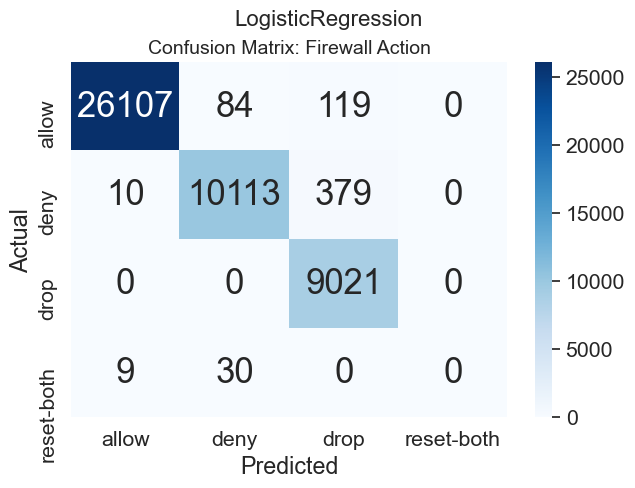

In [177]:
import seaborn as sn
def plot_confusion_matrix(cfm, y_test, caller, algor_name):
    # plot confusion_matrix
    df_cm = pd.DataFrame(cfm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    fig = plt.figure()
    plt.title('Confusion Matrix: ' + caller, fontsize=14)
    plt.suptitle(algor_name, fontsize=16)
    plt.style.use('default')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 25})
    plt.show()
    
plot_confusion_matrix(cm, y_train, 'Firewall Action', type(model).__name__)

Performance measure

In [178]:
# Conducting performance measure on the model
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision = ', precision_score(y_train, y_pred_train, average = "weighted"))
print('Recall = ', recall_score (y_train, y_pred_train, average = "weighted"))
print('F1 score = ', f1_score(y_train, y_pred_train, average = "weighted"))

C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision =  0.9858923602397734
Recall =  0.9862443320544123
F1 score =  0.9858838144594019


In [179]:
# Cross validation of data
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import mean_squared_error as MSE

y_scores = CVS(model, X_test, y_test, cv=5)
print("5-fold cross validation scores: ",y_scores)

y_scores_cv = CVP(model, X_train, y_train, cv=5, method="predict")
print("\nCross Validation Predictions:\n",y_scores_cv)

5-fold cross validation scores:  [0.9794  0.9822  0.98118 0.98194 0.98245]

Cross Validation Predictions:
 ['deny' 'deny' 'allow' ... 'allow' 'allow' 'allow']


To plot Precision Recall Curve and Recall Operating Curve, we need to do one hot encoder for the y - output.

Average precision score, micro-averaged over all classes: 0.98


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.98')

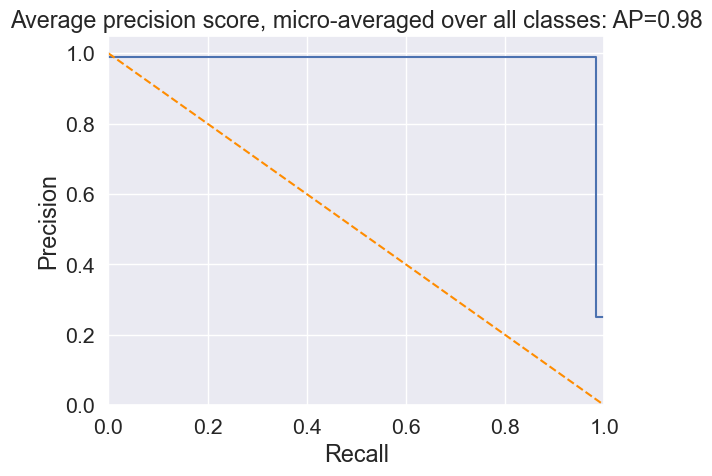

In [180]:
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.multiclass import OneVsRestClassifier as OvsR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve

# One Hot Encode
encoder = OHE(handle_unknown='ignore')
y_num = pd.DataFrame(encoder.fit_transform(firewall_data[['Action']]).toarray())
prc_data = firewall_data.join(y_num)

y_num = y_num.values

# Split into training and test
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X, y_num, test_size=.5,
                                                    random_state=42)

# Run classifier
clf = OvsR(model)
clf.fit(X_train_num, y_train_num)
y_score = clf.predict(X_train_num)


# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y_num.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_train_num)[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(np.array(y_train_num)[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(np.array(y_train_num).ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_train_num, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')
plt.plot([0, 1], [1, 0], color='darkorange', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

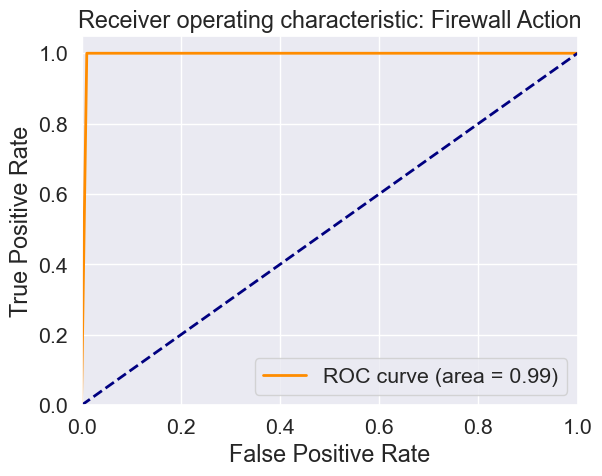

In [181]:
# Plotting of ROC Graph that supports multiclass
from sklearn.metrics import roc_curve, auc

y_score = clf.predict(X_train_num)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_num.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_train_num)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_train_num).ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Firewall Action')
plt.legend(loc="lower right")
plt.show()

In [189]:
# Area Under the Graph
from sklearn.metrics import roc_auc_score as RAS

auc = RAS(y_train_num, y_score)
print('AUC = {:.4f}'.format(auc))

AUC = 0.8642


Grid Search ( Fine Tuning )

In [183]:
from sklearn.model_selection import GridSearchCV
import time

log_model = LogisticRegression(solver = 'lbfgs', max_iter=1000)

# define param_grid (you may used the one defined above)
param_grid = [
    {
    'C': np.logspace(-4, 4, 20),
    'max_iter': [100, 1000, 2500, 5000]
    }
]

# create an instance of GridSearchCV using param_grid with 5-fold cv
grid_search = GridSearchCV(log_model, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

start_time = time.time()
print ('Performing grid search...', end = '')
# perform grid search
grid_result = grid_search.fit(X_train, y_train)
#Summarize results
print("Best: ", grid_result.best_score_, "using", grid_result.best_params_)
print("Execution time: " + str((time.time()-start_time)) + 'ms')
print('done')

Performing grid search...Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  7.8min finished


Best:  0.9901246729146284 using {'C': 1438.44988828766, 'max_iter': 100}
Execution time: 472.1089642047882ms
done


C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1438.44988828766)

As show, the logistic regression classifier best's model hyperparameter is differ from the default.

In [186]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'C': 1438.44988828766, 'max_iter': 100}


Therefore, we can now evaluate our new model on the test set.

In [187]:
print("Testing Sets:", "\nX:\t", X_test.shape, "\ny:\t", y_test.shape)

Testing Sets: 
X:	 (19660, 11) 
y:	 (19660,)


In [195]:
# Prediction on testing sets (unseen data)

clf_final = OvsR(LogisticRegression(C=1438.44988828766))
clf_final.fit(X_test_num, y_test_num)
y_predict_final = clf.predict(X_test_num)

auc_final = RAS(y_test_num, y_predict_final)
print('Logistic Regression Classifier AUC = {:.4f}'.format(auc_final))

C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Logistic Regression Classifier AUC = 0.8649


C:\Users\Wai Hin(Darkin)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing set AUC will usually a bit worse than the validation data as it is fine-tuned to the validation set. Therefore, we can see that the fine-tuned model perform better in test set.

<a id="knn_section"></a>
# k-Nearest Neighbors Classifier
<hr>

In [220]:
# Data Initialization

# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random seeding to ensure we have consistent results
np.random.seed(42)

The output for this datasets consists of 4 unique values: Allow, Deny, Drop and Reset-both.<br>
Thus we must consider a **multioutput regression** solution.<br>
One of the possible training model that could be used is: **k-Nearest Neighbors**.

Since the actual dataset output, y is in categorical value, we need to convert it to a numerical value first.

<a id="data_pros_ohe"></a>
# 2.2 Data Preprocessing - One Hot Encoding
<hr>

In [221]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder as OHE

encoder = OHE(handle_unknown='ignore')
encoder.fit(firewall_data)
encoder.categories_

[array([    0,     5,    20, ..., 65532, 65533, 65534], dtype=int64),
 array([    0,     1,     7, ..., 65504, 65534, 65535], dtype=int64),
 array([    0,    20,    22, ..., 65530, 65534, 65535], dtype=int64),
 array([    0,     1,     7, ..., 65427, 65534, 65535], dtype=int64),
 array(['allow', 'deny', 'drop', 'reset-both'], dtype=object),
 array([        60,         61,         62, ...,  307104860,  428935914,
        1269359015], dtype=int64),
 array([       60,        61,        62, ..., 122661116, 213443641,
        948477220], dtype=int64),
 array([        0,        60,        62, ..., 237428641, 304353862,
        320881795], dtype=int64),
 array([      1,       2,       3, ...,  238334,  635946, 1036116],
       dtype=int64),
 array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
            9,    10,    11,    12,    13,    14,    15,    16,    17,
           18,    19,    20,    21,    22,    23,    24,    25,    26,
           27,    28,    29,    30,    31, 

In [222]:
action_cat = pd.DataFrame(encoder.fit_transform(firewall_data[['Action']]).toarray())
action_cat

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
65527,1.0,0.0,0.0,0.0
65528,1.0,0.0,0.0,0.0
65529,0.0,0.0,1.0,0.0
65530,0.0,0.0,1.0,0.0


In [223]:
data = firewall_data.join(action_cat)
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,0,1,2,3
0,57222,53,54587,53,allow,177,94,83,2,30,1,1,1.0,0.0,0.0,0.0
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9,1.0,0.0,0.0,0.0
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1,1.0,0.0,0.0,0.0
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7,1.0,0.0,0.0,0.0
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2,1.0,0.0,0.0,0.0
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690,1.0,0.0,0.0,0.0
65529,54871,445,0,0,drop,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0


After joining the numerical value of 'Action', we can choose to drop the catergorical value of 'Action'

In [224]:
data = data.drop('Action',axis=1)
data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,0,1,2,3
0,57222,53,54587,53,177,94,83,2,30,1,1,1.0,0.0,0.0,0.0
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,1.0,0.0,0.0,0.0
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,1.0,0.0,0.0,0.0
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,1.0,0.0,0.0,0.0
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2,1.0,0.0,0.0,0.0
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,1.0,0.0,0.0,0.0
65529,54871,445,0,0,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0
65530,54870,445,0,0,70,70,0,1,0,1,0,0.0,0.0,1.0,0.0


In this case, all inputs are very important contributing to the action provided by the firewall thus, all attribute are counted into the model.

In [225]:
# Creating instance of K-NN Alogrithm
from sklearn.neighbors import KNeighborsClassifier as KNClf
action_model = KNClf()

# Splitting dataset into input and outputs; or using the original values
X = firewall_data.drop(['Action'],axis=1)
y = action_cat
y_cat = firewall_data['Action']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
y_train_cat = encoder.inverse_transform(y_train)
y_test_cat = encoder.inverse_transform(y_test)


print("Training Sets:","\nX:\t",X_train.shape,"\ny:\t",y_train.shape)
print("\nTesting Sets:","\nX:\t",X_test.shape,"\ny:\t",y_test.shape)

Training Sets: 
X:	 (45872, 11) 
y:	 (45872, 4)

Testing Sets: 
X:	 (19660, 11) 
y:	 (19660, 4)


In [226]:
# Training the KNN model
action_model.fit(X_train,y_train)

# Making a prediction on the testing sets
y_action_predict = action_model.predict(X_train)

# But first, let's make it readable by converting it back to categorical value
y_action_predict_cat = encoder.inverse_transform(y_action_predict)

# Let's see if the prediction is accurate enough
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    # return string   
    return str1  

def peek_results(actual, predicted, num = 20):
    print('Actual\t\t|\tPredicted')
    print('---------------------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_action_predict_cat))
        print(listToString(actual[sel]), '\t\t|\t', listToString(predicted[sel]))
        
peek_results(y_train_cat, y_action_predict_cat)

Actual		|	Predicted
---------------------------------
allow 		|	 allow
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
deny 		|	 deny
deny 		|	 deny
allow 		|	 allow
drop 		|	 drop
deny 		|	 deny
drop 		|	 drop
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow
deny 		|	 deny
allow 		|	 allow
allow 		|	 allow
allow 		|	 allow


In [227]:
# Accuracy Performance
from sklearn.metrics import accuracy_score as AS
acc = AS(y_action_predict, y_train)

print("Training Accuracy: {:.4f}".format(acc))

Training Accuracy: 0.9947


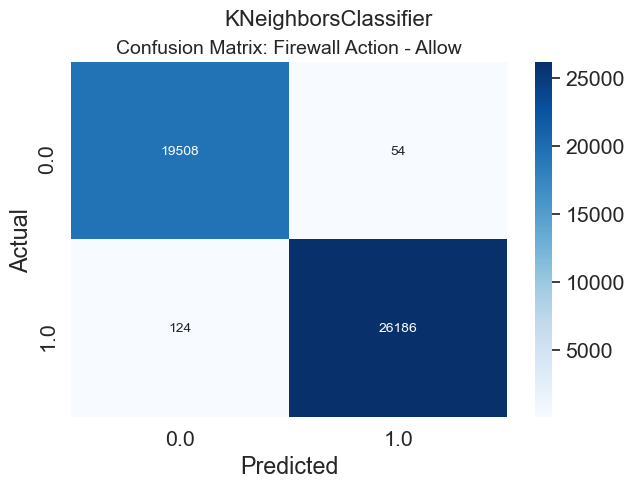

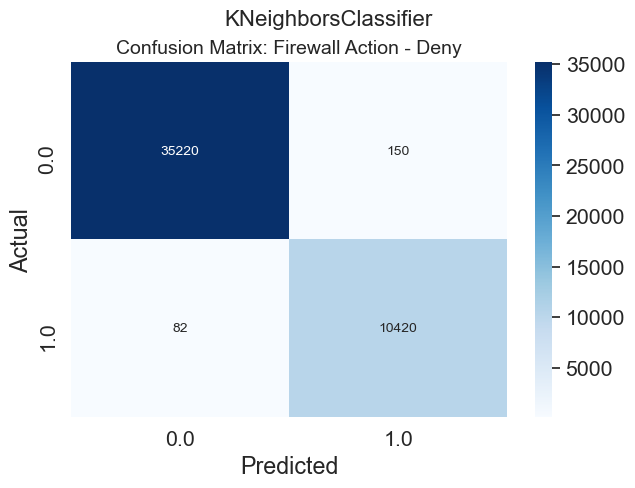

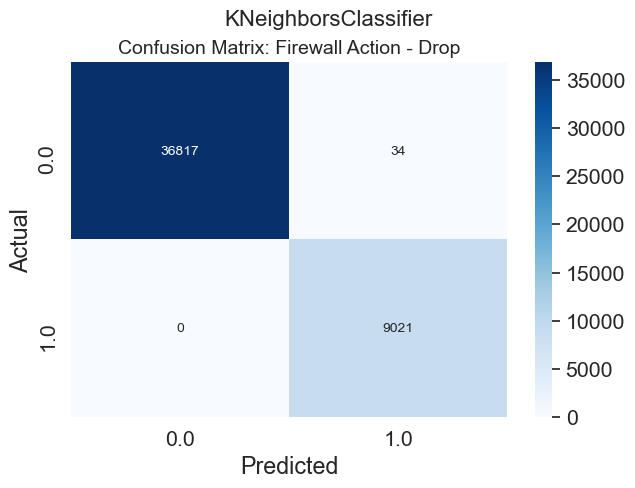

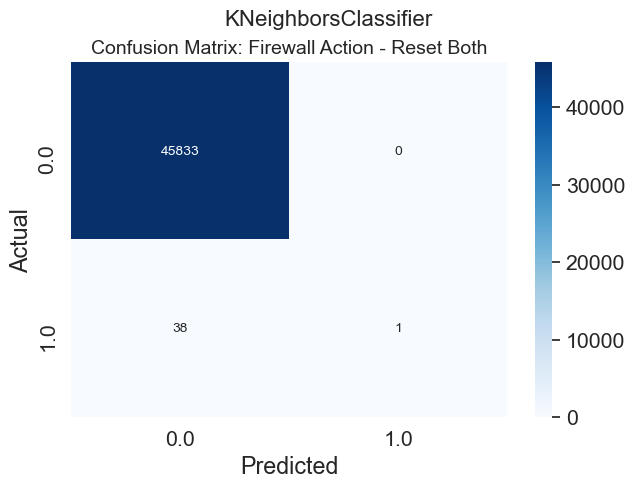

In [228]:
# Plotting the confusion matrix to determine the accuracy and recall
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import multilabel_confusion_matrix as MCM

action_labels=["allow","deny","drop","reset-both"]

c_matrix = MCM(y_train, y_action_predict)

import seaborn as sn
def plot_confusion_matrix(cfm, y_test, caller, algor_name):
    # plot confusion_matrix
    df_cm = pd.DataFrame(cfm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    fig = plt.figure()
    plt.title('Confusion Matrix: ' + caller, fontsize=14)
    plt.suptitle(algor_name, fontsize=16)
    plt.style.use('default')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 10})
    plt.show()

plot_confusion_matrix(c_matrix[0], y_train[0], 'Firewall Action - Allow', type(action_model).__name__)
plot_confusion_matrix(c_matrix[1], y_train[1], 'Firewall Action - Deny', type(action_model).__name__)
plot_confusion_matrix(c_matrix[2], y_train[2], 'Firewall Action - Drop', type(action_model).__name__)
plot_confusion_matrix(c_matrix[3], y_train[3], 'Firewall Action - Reset Both', type(action_model).__name__)


In [229]:
# Conducting performance measure on the model
from sklearn.metrics import precision_score, recall_score, f1_score 

print("Precision\t= {:.4f}".format(precision_score(y_train,y_action_predict,average="weighted")))
print("Recall\t\t= {:.4f}".format(recall_score(y_train,y_action_predict,average="weighted")))
print("F1 Score\t= {:.4f}".format(f1_score(y_train,y_action_predict,average="weighted")))

Precision	= 0.9948
Recall		= 0.9947
F1 Score	= 0.9944


In [230]:
# Cross validation of data
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.metrics import mean_squared_error as MSE

y_scores = CVS(action_model, X_test, y_test, cv=5)
print("5-fold cross validation scores: ",y_scores)

y_scores_cv = CVP(action_model, X_train, y_train, cv=5, method="predict")
print("\nCross Validation Predictions:\n",y_scores_cv)


5-fold cross validation scores:  [0.99186 0.99186 0.99059 0.98957 0.99262]

Cross Validation Predictions:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


Average precision score, micro-averaged over all classes: 0.99


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.99')

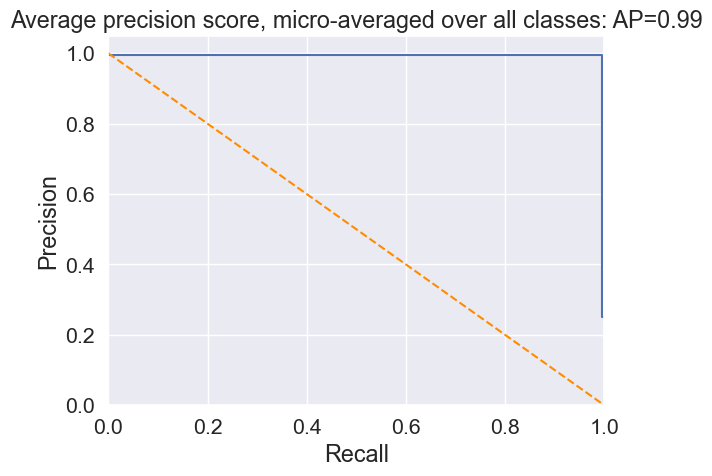

In [231]:
# Plotting of PR Graph that support multiclass
from sklearn.multiclass import OneVsRestClassifier as OvsR
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

# Using OneVsRestClassifier for multi-label prediction
clf = OvsR(KNClf())
clf.fit(X_train, y_train)
y_prob = clf.predict(X_train)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(np.array(y_train)[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(np.array(y_train)[:, i], y_prob[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(np.array(y_train).ravel(), y_prob.ravel())
average_precision["micro"] = average_precision_score(y_train, y_prob, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')
plt.plot([0, 1], [1, 0], color='darkorange', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))

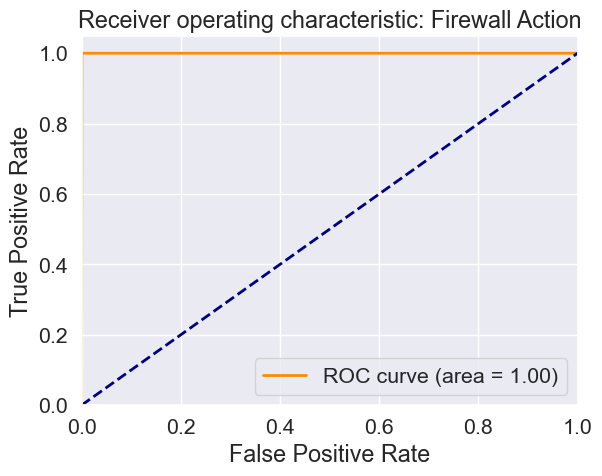

In [232]:
# Plotting of ROC Graph that supports multiclass
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict(X_train)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_train)[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_train).ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Firewall Action')
plt.legend(loc="lower right")
plt.show()



In [233]:
# Area Under the Graph
from sklearn.metrics import roc_auc_score as RAS

auc = RAS(y_train, y_prob)
print('AUC = {:.4f}'.format(auc))

AUC = 0.8756


After plotting both graphs, we can now evaluate and fine-tune the alogrithm.

In [234]:
# Data algorithm fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV as Cal_CCV

calibrated_knn = KNClf()
param_grid = {
    'n_neighbors': [1,3,5,7],
    'p':[1,2],
    'weights':['uniform','distance'],
}
search = GridSearchCV(calibrated_knn, param_grid, cv=5,scoring = 'roc_auc')

print("Initializing grid search...\n")
search.fit(X_train, y_train)
print("Grid Search completed.")


Initializing grid search...

Grid Search completed.


In [235]:
# Evaluating the best model
best_model = search.best_estimator_
print("Best model:\t",best_model)

Best model:	 KNeighborsClassifier(p=1)


As shown, the KNN Classifier best's model hyperparameter is differ from the default.<br>

In [236]:
print('Best hyperparameter settings:', search.best_params_)

Best hyperparameter settings: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Thus we can now evaluate our new model on the test set.

In [237]:
print("Testing Sets:","\nX:\t",X_test.shape,"\ny:\t",y_test.shape)

Testing Sets: 
X:	 (19660, 11) 
y:	 (19660, 4)


In [238]:
# Prediciton on testing sets ( unseen data )
y_action_predict_final = best_model.predict(X_test)

clf_final = OvsR(KNClf(p=1))
clf_final.fit(X_test, y_test)
y_action_predict_final = clf.predict(X_test)

auc_final = RAS(y_test, y_action_predict_final)
print('KNN Classifier AUC = {:.4f}'.format(auc_final))

KNN Classifier AUC = 0.8722


Testing set AUC is usually slightly worse than the validation data as it is fine-tuned to the validation set.

-- End of Algorithm --